<a href="https://colab.research.google.com/github/guillermocalderon2021/03MIAR_Algoritmos_de_Optimizacion/blob/main/Seminario_Algoritmos_GuillermoCalderon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
**Nombre y Apellidos:**  Guillermo de Jesús Calderón <br>
Url: <br>
Problema:
> 1. Sesiones de doblaje <br>


###<b>Descripción del problema: </b><br>
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que se gasto por los servicios de los actores de doblaje sea el menor posible.
....

(*) La respuesta es obligatoria







###**¿Cuántas posibilidades hay sin tener en cuenta las restricciones?**<br>

La **única restricción** que tenemos es el máximo de tomas por día.

Si no tenemos en cuenta esta restricción, entonces tenemos una cantidad muy grande de posibilidades para grabar las 30 tomas: se pueden grabar todas las tomas en un mismo día, o bien grabar una toma un día y 29 otro día, o grabar 10 tomas un día, otras 10 tomas otro día y 10 más un último día... o incluso puede grabarse una toma diaria durante 30 días.

Para este problema, encontrar el número de posibilidades sin tener en cuenta ninguna restricción es equivalente a encontrar el número de **particiones** posibles en un conjunto de $n=30$ elementos.

Para hacer una estimación de ese número de posibilidades vamos a usar el **número de Bell**. En combinatoria, el n-ésimo número de Bell es el número de particiones de un conjunto de n elementos, o equivalentemente, el número de relaciones de equivalencia en el mismo.

Los números de Bell satisfacen la siguiente fórmula recursiva:

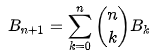

El cálculo del número de Bell para un conjunto de n=30 elementos es bastante engorroso, por lo tanto nos auxuliaremos de un script en Python para calcularlo:

In [ ]:
# Programa para calcular el número de particiones de un conjunto de n elementos
n = 30
s = [[0 for _ in range(n+1)] for _ in range(n+1)]
for i in range(n+1):
    for j in range(n+1):
        if j > i:
            continue
        elif(i==j):
            s[i][j] = 1
        elif(i==0 or j==0):
            s[i][j]=0
        else:
            s[i][j] = j*s[i-1][j] + s[i-1][j-1]
ans = 0
for i in range(0,n+1):
    ans+=s[n][i]
print(ans)

846749014511809332450147


Los resultados obtenidos mediante el script indican que hay un total de $ 8.47  \times
 10^{23} $ posibles resultados si no consideramos las restricciones.

### **¿Cuántas posibilidades hay teniendo en cuenta todas las restricciones?**

La principal restricción del problema es que hay un máximo de 6 tomas que pueden grabarse diariamente. En principio, vamos a asumir que cada día se realizaría ese máximo número de tomas (6), por lo que necesitaríamos 5 días de trabajo para completar las 30 tomas. El problema se transforma entonces en lo siguiente: **¿De cuántas maneras es posible agrupar 30 tomas diferentes en 5 sesiones de 6 tomas de tal manera que cubra las 30 diferentes tomas en los 5 días?**

En un calculo combinatorio inicial tendriamos lo siguiente:

$$\binom{30}{6}\binom{24}{6}\binom{18}{6}\binom{12}{6}\binom{6}{6}=\frac{30!}{(6!)^{5}}$$

Sin embargo, hay que tener en cuenta que el orden de "los dias" de grabación es indiferente. Es decir, en una solución pueden intercambiarse las tomas del dia 1 con las del dia 5 sin que eso afecte a la función objetivo. Debido a esta razón, vamos a eliminar ese sobre-conteo diviendo el resultado anterior por el número de permutaciones en que podríamos ordenar los sets de 6 tomas a lo largo de 5 días, o sea , 5!:

$$posibilidades= \frac{30!}{(6!)^{5}*5!} = 1.14 \times 10^{16} $$






## **Modelo para el espacio de soluciones**<br>
### **¿Cuál es la estructura de datos que mejor se adapta al problema?**

Para representar los datos del problema y de las solucines usaremos la estructura de datos **arreglo** según el siguiente detalle:

- **Arreglo de tomas.** Contendrá los datos de las 30 tomas diferentes y en cada toma los detalles de los actores que participan en ellas. La presencia o no de un actor especifico se determina tal como viene definida en el problema (valor 1 ó 0).

````
tomas = array([[ 1,  1,  1,  1,  1,  0,  0,  0,  0,  0],
              [  0,  0,  1,  1,  1,  0,  0,  0,  0,  0],
              [  0,  1,  0,  0,  1,  0,  1,  0,  0,  0],
              [  1,  1,  0,  0,  0,  0,  1,  1,  0,  0],
              [  0,  1,  0,  1,  0,  0,  0,  1,  0,  0],
              ...
````
- **Arreglo de sesiones.** Consiste en un arreglo unidimensional que almacenará las tomas que se grabarán en un solo dia de rodaje. Se obtendrá al ir explorando las diferentes combinaciones de sesiones de 6 tomas (sin repetición y sin importar el orden) a partir del total de tomas disponibles cada día (30 tomas disponibles el 1er día, 24 el 2º, etc.). Por ejemplo, la siguiente sesión contiene las tomas 1, 2, 3, 4, 5 y 6:

````
sesion = array([ 1,  2,  3,  4,  5,  6])
````
- **Arreglo de soluciones.** Consiste en un arreglo bidimensional (matriz) con 5 filas (una por sesión) y 6 columnas (una por toma). Por ejemplo, la solución consistente en grabar las tomas de forma ordenada en "lotes" de 6 por día se representaría así:

````
solucion = array ([[ 1,  2,  3,  4,  5,  6]
                  [ 7,  8,  9, 10, 11, 12 ]
                  [13, 14, 15, 16, 17, 18 ]
                  [19, 20, 21, 22, 23, 24 ]
                  [25, 26, 27, 28, 29, 30 ]])
````

**NOTA:** Para facilitar la manipulación de estos arreglos usaremos la libreria NumPy de Python.

###**Según el modelo para el espacio de soluciones**<br>
**¿Cuál es la función objetivo? ¿Es un problema de maximización o minimización?**

Para este problema, la función objectivo es una función lineal que representa la suma de los costos diarios en concepto de pago de los actores que participan en las sesiones en cada día. Dado que el pago diario por actor es una constante ($k$) independiente de la cantidad de tomas grabadas en el día, la función objetivo puede escribirse de la siguiente manera:

$$ \text{Costo total} = min\left( \sum_{i=1}^{5} kx_{i} \right)$$

Donde $x_{i}$ es la cantidad de actores que participan en la sesión del i-esimo día y $k$ es el costo unitario por actor y por día (idéntico en nuestro caso para todos los actores y días).

Como se ha mencionado anteriormente, este es un **problema de minimización** de esa función de costo. Nos interesa cubrir las 6 tomas de cada día con el número mínimo de actores con el objetivo de que el gasto total incurrido sea el menor posible.

A continuación vamos a hacer la carga inicial de datos del problema y vamos a construir la función para calcular el costo asociado a una solución.



In [5]:
# Carga inicial de librerias
import numpy as np
import random
import time
from itertools import *
import math

In [83]:
# Cargando datos de la instancia del problema
max_tomas_por_dia=6
tomas = np.genfromtxt('datos_tomas.csv', delimiter=',', skip_header = 1, dtype='uint8')
tomas=tomas[:-2,:-2] # Quitamos las filas y columnas de los totales
rows, columns = tomas.shape
dias=math.ceil((rows-1)/max_tomas_por_dia)# Redondeamos hacia arriba para sacar el número de dias de grabación
print(tomas)
print(dias)

[[255   1   2   3   4   5   6   7   8   9  10]
 [  1   1   1   1   1   1   0   0   0   0   0]
 [  2   0   0   1   1   1   0   0   0   0   0]
 [  3   0   1   0   0   1   0   1   0   0   0]
 [  4   1   1   0   0   0   0   1   1   0   0]
 [  5   0   1   0   1   0   0   0   1   0   0]
 [  6   1   1   0   1   1   0   0   0   0   0]
 [  7   1   1   0   1   1   0   0   0   0   0]
 [  8   1   1   0   0   0   1   0   0   0   0]
 [  9   1   1   0   1   0   0   0   0   0   0]
 [ 10   1   1   0   0   0   1   0   0   1   0]
 [ 11   1   1   1   0   1   0   0   1   0   0]
 [ 12   1   1   1   1   0   1   0   0   0   0]
 [ 13   1   0   0   1   1   0   0   0   0   0]
 [ 14   1   0   1   0   0   1   0   0   0   0]
 [ 15   1   1   0   0   0   0   1   0   0   0]
 [ 16   0   0   0   1   0   0   0   0   0   1]
 [ 17   1   0   1   0   0   0   0   0   0   0]
 [ 18   0   0   1   0   0   1   0   0   0   0]
 [ 19   1   0   1   0   0   0   0   0   0   0]
 [ 20   1   0   1   1   1   0   0   0   0   0]
 [ 21   0   0

Primero construiremos una funcion que nos calcule el costo asociado a una sesión diaria de grabación.

In [7]:
# Función para calcular el costo asociado a un dia de grabación

def calcular_costo_diario(sesion_dia):
	# selecciona del array todas las tomas de la sesión dada, y aplica un OR a todas las columnas a fin de obtener
  # una lista con todos los actores de ese día, y simplemente hace la suma (asumimos el coste unitario por actor)
	cost = np.sum(tomas[sesion_dia,1:].any(axis=0))
	return cost

Por ejemplo, para calcular el costo asociado a un dia en el que se graben las primeras 6 tomas, ejecutariamos la siguiente instrucción:

In [ ]:
calcular_costo_diario([1,2,3,4,5,6])

7

A continuación vamos a construir una función que nos permita calcular el costo asociado a una solución completa (la suma de los costos de los 6 días de grabación).

In [8]:
# Función que calcula el costo total de una solución
def calcular_costo_total(solucion):
	coste_total = 0
	for sesion in solucion: # Para cada dia de grabacion (fila de la matriz de soluciones)
		coste = calcular_costo_diario(sesion)
		coste_total += coste
	return coste_total

Por ejemplo, el costo asociado para la solución en la que se graban las escenas en orden en lotes de 6 se calcularía así:

In [ ]:
# Generamos arreglo con los numeros del 1 al 30 y lo redimensionamos en una matriz 5x6
solucion=np.arange(1,31).reshape(5,6)
costo=calcular_costo_total(solucion)
print(costo)

38


## **Diseña un algoritmo para resolver el problema por fuerza bruta**

Una vez teniendo lista la función para calcular el costo asociado a una solución, procedemos a desarrollar un algoritmo para resolver el problema por fuerza bruta el cual
iría creando cada una de las posibles soluciones (planes de 5 sesiones de 6 tomas distintas) y evaluando el costo total de cada una de ellas. Hacemos uso de la función ``combinations`` del paquete ``itertools`` para ir generando las diferentes combinaciones de tomas que iremos necesitando en cada día.

**NOTA:** Este algoritmo recorre un espacio de soluciones de $1.14 \times 10^{16}$ elementos por lo que se requeriria de demasiado tiempo para explorar todas esas soluciones. **EJECUTAR CON PRUDENCIA!**

In [ ]:
def solucion_fuerza_bruta():
    coste_minimo=50 # Inicialmente guarda el maximo coste posible (los 10 actores los 5 dias de grabacion)
    mejor_solucion=[i for i in range(1, 30+1)] #Solucion inicial
    comb1 = combinations(mejor_solucion,6) # O(n!) !!!
    for p1 in comb1: # Recorremos las combinaciones (a partir de n=30 elementos)
      parcial1=list(set(mejor_solucion)-set(list(p1))) #Quitamos los 6 elementos seleccionados
      comb2 = combinations(parcial1,6) # O(n!) !!!
      for p2 in comb2: #Recorremos las combinaciones (a partir de n=24 elementos)
            parcial2=list(set(parcial1)-set(list(p2))) # Quitamos otros 6 elementos
            comb3 = combinations(parcial2,6) # O(n!) !!!
            for p3 in comb3: #Recorremos las combinaciones (a partir de n=18 elementos)...
              parcial3=list(set(parcial2)-set(list(p3)))
              comb4 = combinations(parcial3,6) # O(n!) !!!
              for p4 in comb4:
                parcial4=list(set(parcial3)-set(list(p4)))
                p5=list(set(parcial4)-set(list(p4)))
                sol=list(p1)+list(p2)+list(p3)+list(p4)+list(p5) #Armamos la solucion uniendo las partes
                current_solution=np.array(sol)
                eval_current_solution = calcular_costo_total(current_solution.reshape(5,6))
                if eval_current_solution < coste_minimo:
                    mejor_solucion = current_solution.reshape(5,6)
                    coste_minimo=eval_current_solution
                    print(f'La mejor solucion encontrada hasta ahora tiene coste {coste_minimo}')
                    print(mejor_solucion)

    return mejor_solucion,coste_minimo

solucion=solucion_fuerza_bruta()
print(f'La solucion encontrada es: {solucion}')

La mejor solucion encontrada hasta ahora tiene coste 38
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]
La mejor solucion encontrada hasta ahora tiene coste 37
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 25]
 [24 26 27 28 29 30]]
La mejor solucion encontrada hasta ahora tiene coste 36
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 23 24 29]
 [22 25 26 27 28 30]]
La mejor solucion encontrada hasta ahora tiene coste 35
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 21 23 24 26 29]
 [20 22 25 27 28 30]]
La mejor solucion encontrada hasta ahora tiene coste 34
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 25]
 [18 19 21 23 24 29]
 [20 22 26 27 28 30]]
La mejor solucion encontrada hasta ahora tiene coste 33
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 22 25]
 [17 18 19 21 23 24]
 [20 26 27 28 29 30]]
La mejor solucion encontrada

KeyboardInterrupt: ignored

###**Calcula la complejidad del algoritmo por fuerza bruta**

La función `solucion_fuerza_bruta` utiliza bucles anidados y combinaciones para generar todas las posibles soluciones y encontrar la solución con el menor costo.

1. Primero se generan todas las combinaciones posibles de 6 elementos seleccionados de un conjunto de 30 elementos (línea `comb1 = combinations(mejor_solucion, 6)`). Esto tiene una complejidad de O(n!) debido al número exponencial de combinaciones posibles.

2. Dentro del primer bucle, se generan todas las combinaciones posibles de 6 elementos seleccionados del conjunto complementario (línea `comb2 = combinations(parcial1, 6)`). Esto también tiene una complejidad de O(n!).

3. Dentro del segundo bucle, se generan todas las combinaciones posibles de 6 elementos seleccionados del conjunto complementario (línea `comb3 = combinations(parcial2, 6)`). Esto también tiene una complejidad de O(n!).

4. Dentro del tercer bucle, se generan nuevamente todas las combinaciones posibles de 6 elementos seleccionados del conjunto complementario (línea `comb4 = combinations(parcial3, 6)`). Esto también tiene una complejidad de O(n!).

En cada bucle, se realizan operaciones de conjuntos y conversiones a listas para construir las soluciones parciales. Luego se calcula el costo total de cada solución parcial utilizando la función `calcular_costo_total`, que se ejecuta en tiempo lineal en función del tamaño de la solución (5 x 6 en este caso).

Dado que el bucle más interno tiene una complejidad de O(n!) y se anida dentro de otros bucles con la misma complejidad, podemos decir que el algoritmo tiene una complejidad de ``(n!)^4``; sin embargo, en notación asintótica eso se escribiría como **``O(n!)``** donde n es el tamaño inicial del conjunto (30 en este caso).



## **Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta.**

Vamos a resolver este problema mediante la metaheuristicas del recocido simulado

### **Solución mediante recocido simulado**
El uso de esta metaheuristica en la solución del problema nos permitirá explorar el espacio de búsqueda en diferentes regiones con cierto nivel de aleatoriedad (diversificación) aunque algo más controlado que si se probara únicamente con un algoritmo de búsqueda aleatoria. En cualquier caso, para generar una solución de partida, si que haremos uso de un simple algoritmo de búsqueda aleatoria sobre un número no muy grande de iteraciones.

Comencemos programando algunas funciones auxiliares que emplearemos dentro del algoritmo principal:


In [9]:
#Función para generar una solución aleatoria
def generar_solucion_aleatoria():
    solucion=np.arange(1,31)
    np.random.shuffle(solucion)
    return solucion.reshape(5,6)

# Función para generar una solución inicial de partida usando Búsqueda Aleatoria
def busqueda_aleatoria(n):
    # por defecto, coste máximo asumiendo se necesitaran los 10 actores cada día
    mejor_coste = 50
    mejor_plan = []
    for i in range(n):
        plan = generar_solucion_aleatoria()
        coste=calcular_costo_total(plan)
        if coste < mejor_coste:
            mejor_coste = coste
            mejor_plan = plan
    return mejor_plan, mejor_coste


In [18]:
# Función para generar una solución vecina intercambiando 6 tomas aleatoriamente
def genera_plan_vecino(solucion):
  plan = solucion.flatten()
  # Se eligen dos nodos aleatoriamente
  i,j,m,n,x,y = sorted(random.sample( range(1,len(plan)) , 6))
  # Devuelve una nueva solución pero intercambiando los seis nodos elegidos al azar
  plan[i],plan[j]=plan[j],plan[i]
  plan[m],plan[n]=plan[n],plan[m]
  plan[x],plan[y]=plan[y],plan[x]
  # la devuelvo como array en vez de lista, para usarla en mis otras funciones
  return np.array(plan).reshape(5,6)


In [11]:
# Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  return random.random() <  math.exp( -1*d / T)

El código de la implementación del recocido simulado para este problema es el siguiente:

In [44]:
### ALGORITMO PRINCIPAL DE RECOCIDO SIMULADO ###
def recocido_simulado(plan_referencia, temperatura):
  coste_plan_referencia=calcular_costo_total(plan_referencia)
  mejor_coste = 50
  print("Starting recocido simulado...")
  print(f'Solucion inicial: {plan_referencia} con costo {coste_plan_referencia}')
  n=0
  while temperatura > .0001:
    n+=1
    # Genera una solución vecina
    plan_vecino = genera_plan_vecino(plan_referencia)

    # Calcula su coste
    coste_plan_vecino = calcular_costo_total(plan_vecino)

    # Si es la mejor solución de todas se guarda
    if coste_plan_vecino < mejor_coste:
        mejor_plan = plan_vecino.copy()
        mejor_coste = coste_plan_vecino
        print(f'Solucion con n={n}:\n {mejor_plan} con costo {mejor_coste}')

    # Si es peor se cambia según una probabilidad que depende de T y delta(coste_plan_referencia - coste_plan_vecino))
    if coste_plan_vecino < coste_plan_referencia or probabilidad(temperatura, abs(coste_plan_referencia - coste_plan_vecino)) :
      plan_referencia = plan_vecino.copy()
      coste_plan_referencia = coste_plan_vecino
    #Bajamos la temperatura
    temperatura = temperatura*0.999
  return mejor_plan, mejor_coste

Vamos a aplicar el algoritmo anterior generando aleatoriamente una solución inicial.

In [57]:
solucion_inicial=generar_solucion_aleatoria()
mejor_plan, coste_mejor_plan  = recocido_simulado(solucion_inicial, 1000)
print("----------------------------------------------------")
print("SOLUCIÓN PROPORCIONADA POR EL ALGORITMO:\n\n", mejor_plan)
print("\nCoste:\n\n", coste_mejor_plan, " salarios")
print("----------------------------------------------------")

Starting recocido simulado...
Solucion inicial: [[27  5 22  4 15  3]
 [21  9 28 30 23 16]
 [25 11 12  1  6 13]
 [18 19 17 24 29  8]
 [ 7 10 14 26 20  2]] con costo 34
Solucion con n=1:
 [[27 22  5  4 15  3]
 [21  9 12 30 23 16]
 [25 11 28  1  6 13]
 [18 19 17 24 29 14]
 [ 7 10  8 26 20  2]] con costo 32
Solucion con n=7968:
 [[27 28 19  5 21  6]
 [ 7  2  1 26 13 20]
 [25  9 30 16  8 10]
 [14 18 23 12 22 24]
 [29  4 15 11  3 17]] con costo 31
Solucion con n=8150:
 [[27  6  7  5 16 25]
 [13 28  2 26 20 30]
 [ 1 17 12 10  9 19]
 [24 23 18  8 22 14]
 [ 4 15 21 29 11  3]] con costo 30
Solucion con n=8163:
 [[27  6  7  5 16 25]
 [30 28  2 26 20  1]
 [13  9 12 10  8 22]
 [24 23 18 17 19 14]
 [ 4 29 21 15 11  3]] con costo 29
Solucion con n=8206:
 [[27 16  7 13  6 25]
 [30  9 26 28 20 22]
 [ 1  2  5 10 11 12]
 [24 23 18 17 14 19]
 [ 8 29  3 21  4 15]] con costo 28
Solucion con n=8281:
 [[27 25 13 16  6  7]
 [30 26  9 12 22 10]
 [11  1  2 20  5 28]
 [19 14 18 17 23 24]
 [29  8  3 15 21  4]] con

### **Calcula la complejidad del algoritmo**

Para calcular la complejidad del algoritmo construido con base en la metaheuristica "recocido simulado" vamos a analizar cada función por aparte:

- Función `generar_solucion_aleatoria()`: Esta función hace una invocación a `np.random.shuffle()`, que realiza un cambio aleatorio en los elementos de la matriz. La complejidad de `np.random.shuffle()` es O(N), donde N es el número de elementos en la matriz. Por lo tanto, la complejidad de `generar_solucion_aleatoria()` es O(N).

- Función `recocido_simulado()`: La complejidad de este algoritmo depende del número de iteraciones en el bucle `while`. La condición de parada del bucle es que la temperatura sea mayor que 0.0001, y la temperatura se reduce en cada iteración multiplicándola por 0.999. Este modo de descenso de temperatura se denomina descenso exponencial. La complejidad de este componente sería $O(log(n))$. Por otra parte, dentro del bucle se realizan repetidamente una serie de operaciones, entre ellas la más importante quizás sea la generación de la solución vecina, que presenta una complejidad constante  y el cálculo del costo de la solución que tiene una complejidad de $O(n)$.

Por tanto, la complejidad del algoritmo sería:

$$O(n*log(n))$$
.

## **Según el problema, diseña un juego de datos de entrada aleatorios**

Vamos a generar una nueva instancia del problema para posteriormente aplicar el algoritmo.

In [97]:
tomas = np.random.randint(2, size=(31, 11))
print(tomas)

[[0 0 1 1 1 1 0 1 1 1 1]
 [0 0 0 0 1 0 1 1 0 1 0]
 [0 1 1 1 0 0 1 0 1 1 0]
 [1 1 0 1 0 1 1 1 1 1 0]
 [1 1 1 0 0 0 1 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0 0]
 [1 1 1 1 0 1 0 1 0 1 1]
 [0 1 0 0 0 0 1 1 0 0 1]
 [0 1 0 0 0 1 0 1 0 1 0]
 [0 1 1 1 0 0 0 0 0 1 0]
 [1 1 1 0 0 1 1 1 0 0 1]
 [1 1 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 1 1 1 1 1 0]
 [0 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 1 0 1 0]
 [0 1 0 1 0 0 0 0 1 1 0]
 [1 1 0 1 0 1 1 1 1 0 0]
 [1 1 0 1 1 1 1 1 1 0 0]
 [1 0 0 1 0 0 1 0 0 1 1]
 [0 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 1 0]
 [0 1 0 0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 1 0 1 1 1]
 [0 1 1 1 1 0 0 1 0 1 0]
 [0 0 1 1 1 1 0 0 0 1 0]
 [0 1 1 1 1 0 1 1 0 1 1]
 [1 0 1 0 0 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 1 0 0]
 [1 0 1 0 1 1 1 0 0 1 0]
 [1 1 1 1 0 0 1 0 1 1 1]]


## **Aplica el algoritmo al juego de datos generado**

Aplicando el algoritmo a los datos de la nueva instancia, se obtienen los siguientes resultados:

In [98]:
solucion_inicial=generar_solucion_aleatoria()
mejor_plan, coste_mejor_plan  = recocido_simulado(solucion_inicial, 1000)
print("----------------------------------------------------")
print("SOLUCIÓN PROPORCIONADA POR EL ALGORITMO:\n\n", mejor_plan)
print("\nCoste:\n\n", coste_mejor_plan, " salarios")
print("----------------------------------------------------")

Starting recocido simulado...
Solucion inicial: [[19 22  7 18 15  5]
 [13 21  4  2 25 29]
 [10 27  8  9 28 23]
 [26 20 24  3  6 30]
 [16 12 14 17 11  1]] con costo 47
Solucion con n=1:
 [[19 22  7 18 27  5]
 [13 21  4  2 25 29]
 [10 15  8  9 28 23]
 [24 20 26  3 30  6]
 [16 12 14 17 11  1]] con costo 48
Solucion con n=12:
 [[19  7 18  4  2 20]
 [21 23 29 25 10  5]
 [22  6 27 30  8 12]
 [13 15 28  9  1 17]
 [16 24 11 14 26  3]] con costo 47
Solucion con n=135:
 [[19  7 30 20 14  1]
 [ 8 16  6 15 18  3]
 [28 12 26 29 23 11]
 [24 13 21  2  5  9]
 [17 27 25 10  4 22]] con costo 46
Solucion con n=136:
 [[19  7 18 20 14  1]
 [ 8 16  6 15 30  3]
 [28 12 26 23 29 11]
 [24 13  5  2 21  9]
 [17 27 25 10  4 22]] con costo 45
Solucion con n=7350:
 [[19 15 20 13 11 14]
 [18  7  4  2 30 23]
 [ 1  5  9 24 25 29]
 [12 27 10  6 26 21]
 [ 8 28 16 22  3 17]] con costo 44
Solucion con n=8037:
 [[19  5  1 14 17  3]
 [29  2 27 23 12  4]
 [ 7 10 25 18 26  6]
 [20 24 22  9 28 15]
 [16 13 11 30  8 21]] con cos

### **Enumera las referencias que has utilizado para llevar a cabo el trabajo**

1. Long, Xiaoqing & Jinxing, Zhao. (2020). Scheduling Problem of Movie Scenes Based on Three Meta-Heuristic Algorithms. IEEE Access. PP. 1-1. 10.1109/ACCESS.2020.2982664.
2. Yulian Liu, Qiuji Sun, Xiaotian Zhang, Yiwei Wu, "Research on the Scheduling Problem of Movie Scenes", Discrete Dynamics in Nature and Society, vol. 2019, Article ID 3737105, 8 pages, 2019. https://doi.org/10.1155/2019/3737105
3. T. Cheng, J. Diamond, and B. Lin. Optimal scheduling in film production to minimize talent hold cost. Journal of Optimization Theory and Applications, 79(3):479–492, 1993.

### **Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**

Este problema de asignación podría apliarse agregando nuevas restricciones, por ejemplo, diferentes salarios para cada autor. En este caso, la función objetivo tendría que ser evaluada teniendo en cuenta cuáles actores específicos estarían participando en una sesión de grabación. Otra restricción, un poco poco más díficil de abordar podría ser la disponibilidad horaria de cada actor.

En cuanto al uso de metaheuristicas para resolver este problema, consideramos que un algoritmo multiarranque basado en GRASP podría dar buenos resultados pues realizaría una búsqueda ya no tan a ciegas, sino usando la información del dominio del problema.

